In [1]:
# Load the necessary packages
import json, re, networkx as nx, numpy as np, os, sys, nltk, matplotlib.pyplot as plt, pandas as pd, wordcloud
from tqdm import tqdm_notebook
from scipy.stats import spearmanr
from os import path
from PIL import Image

# Sentiment Analysis of the different pokemon types 

In [5]:
# Load the pokemon dataframe

poke_df = pd.read_csv('pokemon_data.csv')
poke_df.head()

,Pokémon,Sentiment,Sentiment_stemmed,Type,HP,Attack,Defense,SpAtk,SpDef,Speed,Total,Generation,Legendary,Tokens,Tokens_stemmed
0,Voltorb,5.878889,5.902800,Electric,40,30,50,55,55,100,330,I,None,"['voltorb', 'spherical', 'pokémon', 'resembles...","['voltorb', 'spheric', 'pokémon', 'resembl', '..."
1,Electrode,5.716471,5.585263,Electric,60,50,70,80,80,140,480,I,None,"['electrode', 'round', 'pokémon', 'resembling'...","['electrod', 'round', 'pokémon', 'resembl', 'r..."
2,Exeggcute,5.632933,5.577097,"('Grass', 'Psychic')",60,40,80,60,45,40,325,I,None,"['exeggcute', 'pokémon', 'resembling', 'six', ...","['exeggcut', 'pokémon', 'resembl', 'six', 'lig..."
3,Exeggutor,5.623797,5.670000,"('Grass', 'Psychic')",95,95,85,125,65,55,520,I,None,"['exeggutor', 'tall', 'bipedal', 'pokémon', 'r...","['exeggutor', 'tall', 'biped', 'pokémon', 'res..."
4,Cubone,5.261880,5.271667,Ground,50,50,95,40,50,35,320,I,None,"['cubone', 'small', 'bipedal', 'pokémon', 'lig...","['cubon', 'small', 'biped', 'pokémon', 'light'..."


In [6]:
# Get all the found pokemon types
poke_types = poke_df.Type.unique()
corr_dict = {}
corr_dict_stemmed = {}
for poke_type in tqdm_notebook(poke_types):
    # First get the pokemons with the specific type
    pokemons_by_type = poke_df[poke_df['Type'] == poke_type]
    
    # Get their sentiment values and their total stats
    pokemons_by_type_sentiment_stemmed = pokemons_by_type['Sentiment_stemmed']
    pokemons_by_type_sentiment = pokemons_by_type['Sentiment']
    pokemons_by_type_total = pokemons_by_type['Total']
    
    # Check correlation between biology text sentiment and total stats and store it
    corr_coef_stemmed = spearmanr(pokemons_by_type_sentiment_stemmed, pokemons_by_type_total)[0]
    corr_coef = spearmanr(pokemons_by_type_sentiment, pokemons_by_type_total)[0]
    
    # Only check for correlation if more than 5 pokemons of this type exists
    if len(pokemons_by_type) >= 5:
        corr_dict[poke_type] = corr_coef
        corr_dict_stemmed[poke_type] = corr_coef_stemmed
        
    
    

C:\Users\Bruger\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Bruger\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Bruger\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Bruger\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Bruger\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


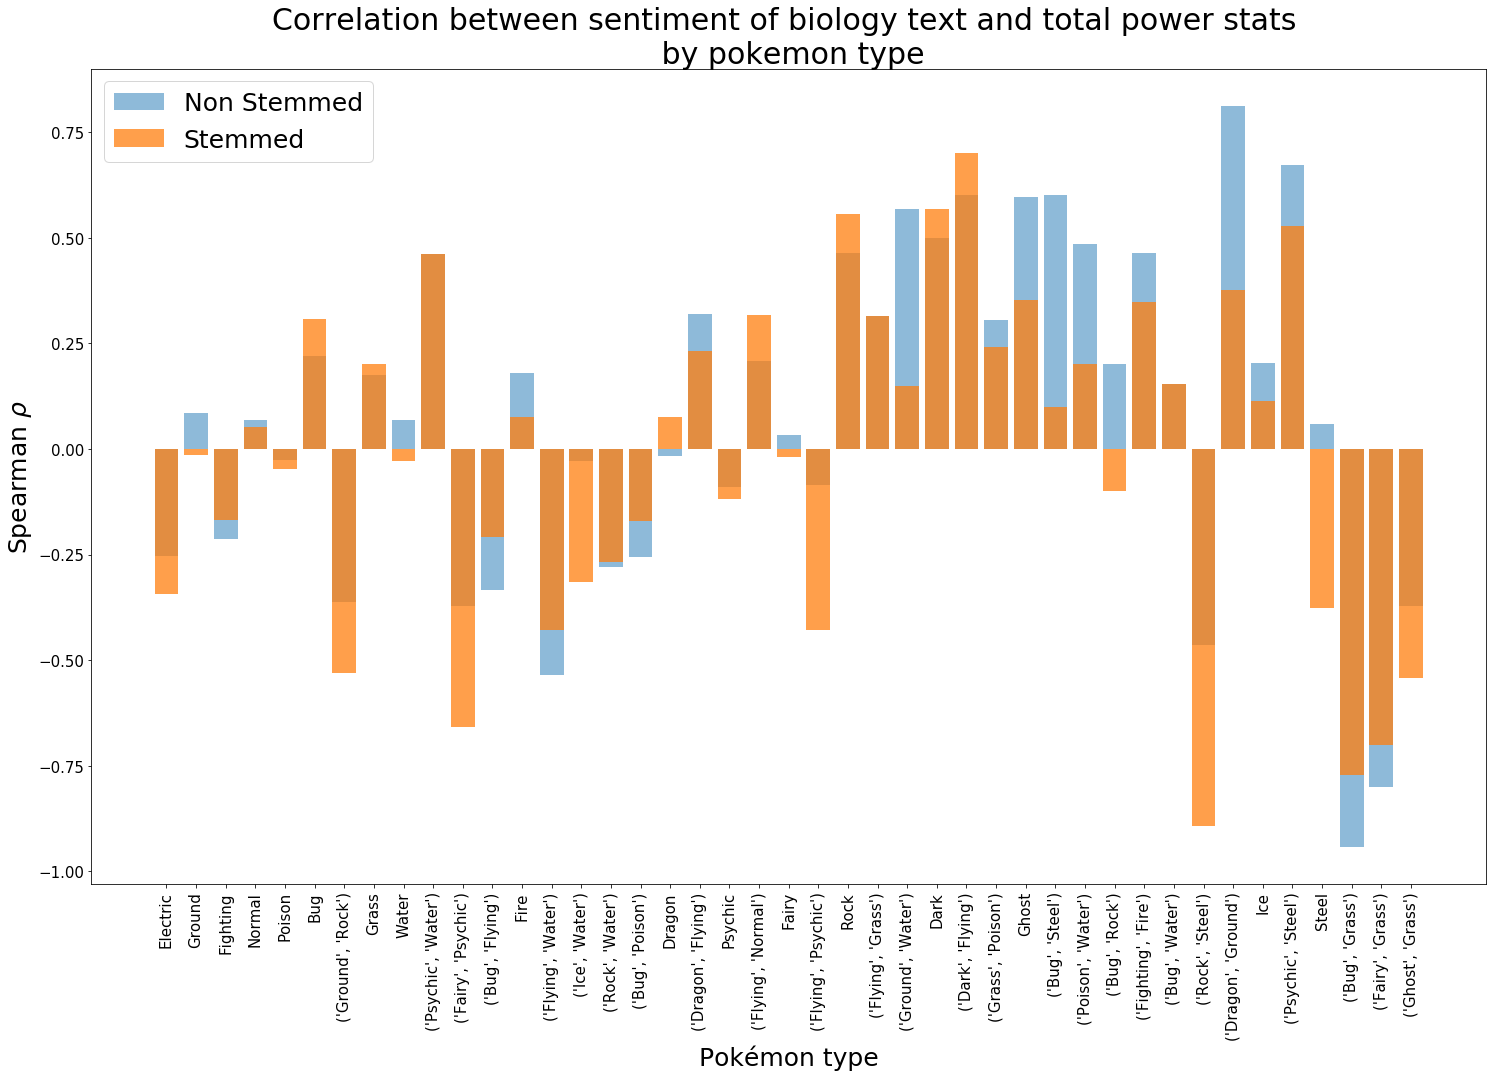

In [7]:
# Plot the results for both the stemmed and non stemmed versions
plt.figure(figsize=(25,15))
plt.bar((corr_dict.keys()), (corr_dict.values()), label = 'Non Stemmed', alpha = .5)
plt.bar((corr_dict_stemmed.keys()), (corr_dict_stemmed.values()), label = 'Stemmed', alpha = .75)
plt.xticks(rotation='vertical', size=15)
plt.yticks(size=15)
plt.title('Correlation between sentiment of biology text and total power stats \n by pokemon type', fontsize = 30)
plt.ylabel(r'Spearman $\rho$', fontsize = 25)
plt.xlabel('Pokémon type', fontsize = 25)
plt.legend(fontsize = 25)
plt.show()

In [18]:
poke_df[poke_df.Type=="('Rock', 'Steel')"]

,Pokémon,Sentiment,Sentiment_stemmed,Type,HP,Attack,Defense,SpAtk,SpDef,Speed,Total,Generation,Legendary,Tokens,Tokens_stemmed
226,Aron,5.489333,5.488929,"('Rock', 'Steel')",50,70,100,40,40,30,330,III,None,"['aron', 'quadruped', 'pokémon', 'four', 'stub...","['aron', 'quadrup', 'pokémon', 'four', 'stubbi..."
227,Lairon,5.554516,5.601455,"('Rock', 'Steel')",60,90,140,50,50,40,430,III,None,"['lairon', 'stocky', 'armored', 'pokémon', 'fo...","['lairon', 'stocki', 'armor', 'pokémon', 'four..."
228,Aggron,5.307196,5.402347,"('Rock', 'Steel')",70,110,180,60,60,50,530,III,None,"['aggron', 'huge', 'bipedal', 'pokémon', 'prim...","['aggron', 'huge', 'biped', 'pokémon', 'primar..."
344,Shieldon,5.464500,5.709118,"('Rock', 'Steel')",30,42,118,42,88,30,350,IV,None,"['shieldon', 'small', 'yellow', 'ceratopsian-l...","['shieldon', 'small', 'yellow', 'ceratopsian-l..."
345,Bastiodon,5.414222,5.430000,"('Rock', 'Steel')",60,52,168,47,138,30,495,IV,None,"['bastiodon', 'appears', 'cross', 'zuniceratop...","['bastiodon', 'appear', 'cross', 'zuniceratop'..."
416,Probopass,5.490357,5.413023,"('Rock', 'Steel')",60,55,145,75,150,40,525,IV,None,"['probopass', 'mini-noses', 'probopass', 'most...","['probopass', 'mini-nos', 'probopass', 'mostli..."
781,Stakataka,5.447910,5.314182,"('Rock', 'Steel')",61,131,211,53,101,13,570,VII,None,"['stakataka', 'ultra', 'beast', 'composed', 'm...","['stakataka', 'ultra', 'beast', 'compos', 'man..."


In [17]:
poke_df.Type[3]

"('Grass', 'Psychic')"

In [8]:
# Used to generate the word clouds for each type
single_types = sorted(poke_df.Type.unique())[119:]
single_types

['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

In [9]:
type_tokens = {}

# Loop through all the single types
for types in single_types:
    type_tokens[types] = ""
    # Get all the tokens for that specific type
    tokens = poke_df.Tokens[poke_df.Type == types]    
    
    # Join all the tokens in a large string and store it in a dictionary indexed by type as key
    for token in tokens:
        type_tokens[types] += " ".join(eval(token))
        type_tokens[types] += " "

In [11]:
wordclouds = {}
for types in tqdm_notebook(type_tokens):
    wordclouds[types] = wordcloud.WordCloud(stopwords=['pokémon','two','three','like']
                        , collocations=False, background_color='white', width = 500, height = 300).generate(type_tokens[types])

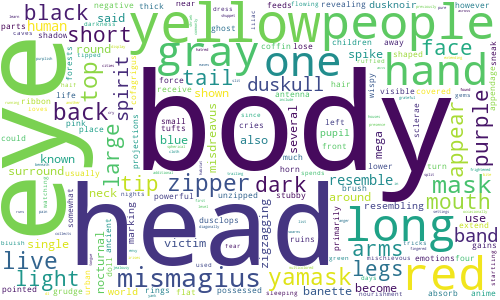

In [12]:
wordclouds['Ghost'].to_image()